# <span style="color:#79B791"> 1. Exploratory Data Analysis (EDA) </span>

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

Exploratory data analysis is generally cross-classified in two ways. 

- First, each method is either non-graphical or graphical. 
- And second, each method is either univariate or multivariate (usually just bivariate).

## <span style="color:#79B791">     - How to choose a statistical model? </span>

### <span style="color:#D6D5B3"> Three important steps before EDA: </span>

1. Understand the data
2. Clean the data
3. Find a relationship between the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
kashti.to_csv("kashti.csv")

In [4]:
kashti = sns.load_dataset("titanic")

In [7]:
kashti.to_csv("kashti.csv")

In [8]:
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
ks = kashti

In [10]:
# Get a look at the data
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# find out the number of rows and columns in the data
ks.shape

(891, 15)

In [13]:
ks.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [14]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# find out the number of unique values in each column. This will help us in plotting.
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [18]:
# get a look at the column/head
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [20]:
# get all the unique values in a column
ks["sex"].unique()

array(['male', 'female'], dtype=object)

In [21]:
ks["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [28]:
# USE numpy.unique() TO FIND THE UNIQUE VALUES IN MULTIPLE COLUMNS OF A PANDAS DATAFRAME

kas = ks[["sex","who"]].values
np.unique(kas)

array(['child', 'female', 'male', 'man', 'woman'], dtype=object)

## Cleaning and Filtering the Data

#### Steps

1. Find the missing values first

In [31]:
# find the missing values first by the "isnul". The ones with the value "True" is actually a null value.
ks.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
# the number of missing values in each column
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
# Drop the column(s) that have the most number of missing values because that will mess up our data - cleaning the data

ks_clean = ks.drop(["deck"],axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [51]:


ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [42]:
ks_clean.shape

(891, 14)

In [48]:
# Drop all the N/A values from data - update the ks_clean
ks_cleanUP = ks_clean.dropna()

In [49]:
ks_cleanUP.shape

(712, 14)

In [50]:
# remove all the missing values
ks_cleanUP.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [52]:
ks.shape

(891, 15)

In [53]:
ks_clean.shape

(712, 14)

In [54]:
ks_cleanUP.shape

(712, 14)

In [55]:
ks_clean["sex"].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [56]:
ks_clean["age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [59]:
# The number of a particular instance in the data

ks_clean["fare"].value_counts()

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
6.2375      1
14.0000     1
9.4750      1
8.8500      1
10.5167     1
Name: fare, Length: 219, dtype: int64

### The difference between cleaned and uncleaned data

In [60]:
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Finding the ourliers

In [62]:
ks_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

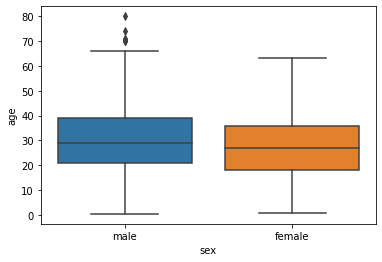

In [63]:
sns.boxplot(x="sex",y="age",data=ks_clean)

The points lying beyond the whiskers are outliers. This data can be removed.

<AxesSubplot:ylabel='age'>

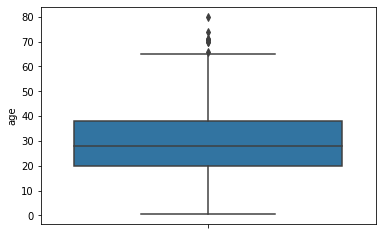

In [64]:
sns.boxplot(y="age",data=ks_clean)

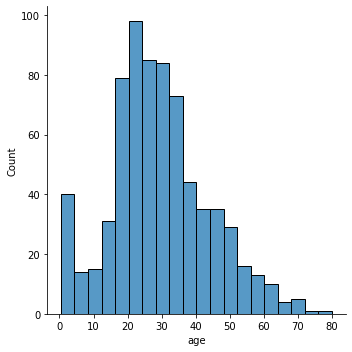

In [75]:
# Bell curve, normallity check
sns.displot(ks_clean["age"])

### Removing outliers


In [77]:
ks_clean['age'].mean()

29.64209269662921

In [89]:
# removing all the age data that is greater than 68
ks_clean = ks_cleanUP[ks_cleanUP['age']<68]
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [90]:
ks_clean.shape

(705, 14)

In [91]:
ks_clean['age'].mean()

29.21797163120567

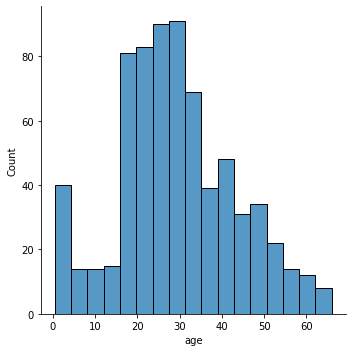

In [92]:
sns.displot(ks_clean["age"])

<AxesSubplot:ylabel='age'>

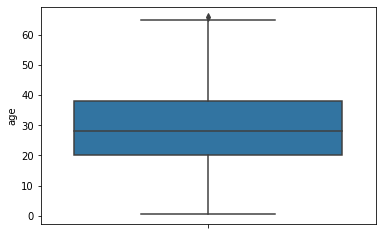

In [93]:
sns.boxplot(y="age",data=ks_clean)

In [94]:
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

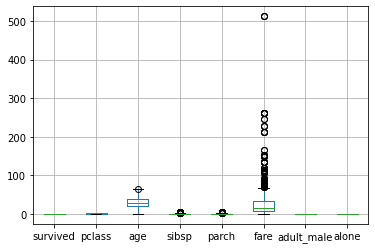

In [95]:
ks_clean.boxplot()

<AxesSubplot:>

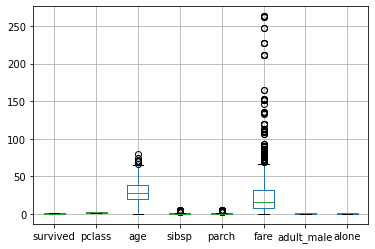

In [97]:
ks_clean = ks_cleanUP[ks_cleanUP['fare']<300]
ks_clean.boxplot()

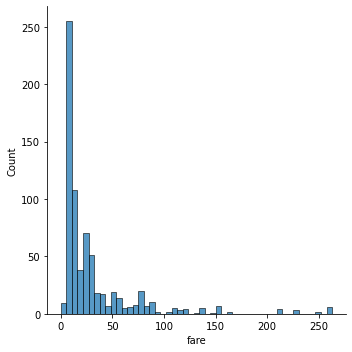

In [98]:
sns.displot(ks_clean["fare"])

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

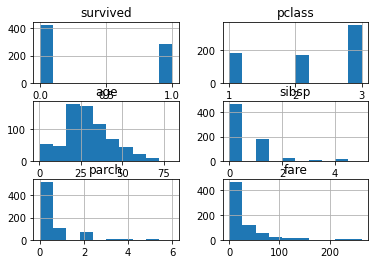

In [99]:
ks_clean.hist()

<AxesSubplot:>

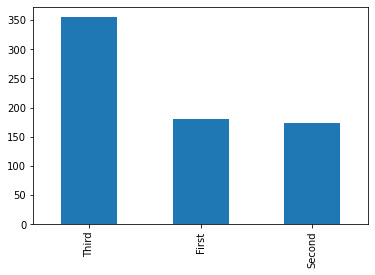

In [102]:
pd.value_counts(ks_clean["class"]).plot.bar()

### Cleaned data insights


In [111]:
ks_clean.groupby(["sex","class"]).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.963415     1.0  34.231707  0.560976  0.512195  103.696393   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.383838     1.0  41.398182  0.383838  0.333333   62.229924   
       Second  0.151515     2.0  30.740707  0.373737  0.242424   21.113131   
       Third   0.150198     3.0  26.507589  0.490119  0.256917   12.162695   

               adult_male     alone  
sex    class                         
female First     0.000000  0.353659  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.969697  0.535354  
       Second    0.909091  0.636364  
       Third     0.889328  0.739130

### Orignal data insights


In [110]:
ks.groupby(["sex","class"]).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

## <span style="color:#D6D5B3">Relationship between different parameters of the Data

In [114]:
# correlation matrix

# Positive is direct relation while negative is the inverse relation between variables.

cor_ks_cleanUP = ks_cleanUP.corr()

<AxesSubplot:>

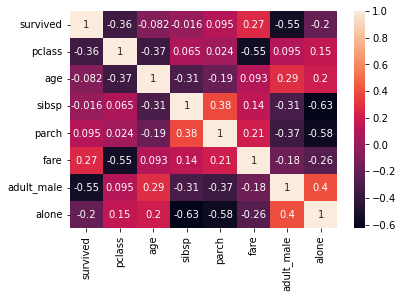

In [116]:
sns.heatmap(cor_ks_cleanUP, annot=True)

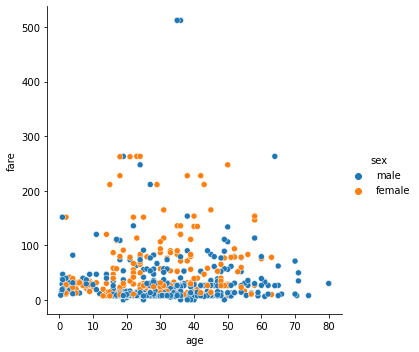

In [119]:
sns.relplot(x="age",y="fare",hue="sex",data=ks_cleanUP)

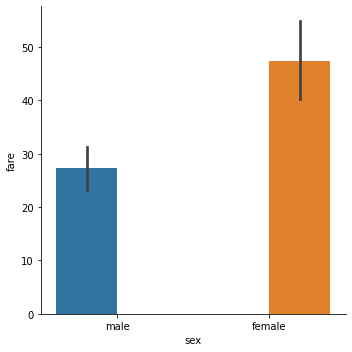

In [121]:
sns.catplot(x="sex",y="fare",hue="sex",data=ks_cleanUP, kind="bar")

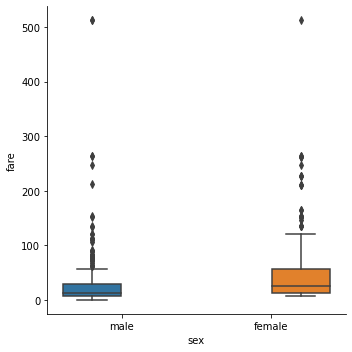

In [122]:
sns.catplot(x="sex",y="fare",hue="sex",data=ks_cleanUP, kind="box")

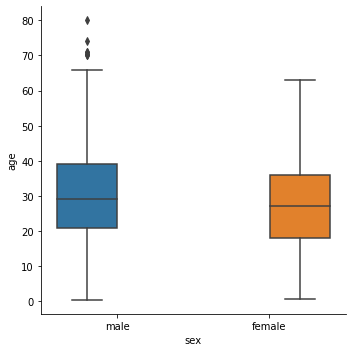

In [124]:
sns.catplot(x="sex",y="age",hue="sex",data=ks_cleanUP, kind="box")